In [1]:
import logging
import numpy as np
import fiona.crs
from matplotlib import pyplot as plt
from matplotlib import patches as pltp
from matplotlib import collections as pltc
import matplotlib.colors
import mpl_toolkits.basemap as pbm

import workflow
import workflow.ui
import workflow.warp

workflow.ui.setup_logging(1,None)

In [3]:
# set the HUC you wish to image, in this case the Delaware River Basin
HUC = '0204'
crs = fiona.crs.from_epsg('4269')

logging.info("")
logging.info("Meshing HUC: {}".format(HUC))
logging.info("="*30)
logging.info('Target projection: "{}"'.format(crs['init']))
    

2019-07-09 23:29:38,638 - root - INFO: 
2019-07-09 23:29:38,640 - root - INFO: Meshing HUC: 0204
2019-07-09 23:29:38,641 - root - INFO: ==============================
2019-07-09 23:29:38,644 - root - INFO: Target projection: "epsg:4269"


In [4]:
# get the sources
sources = workflow.source_list.get_default_sources()
workflow.source_list.log_sources(sources)

2019-07-09 23:29:38,825 - root - INFO: Using sources:
2019-07-09 23:29:38,826 - root - INFO: --------------
2019-07-09 23:29:38,828 - root - INFO: HUC: National Watershed Boundary Dataset (WBD)
2019-07-09 23:29:38,829 - root - INFO: hydrography: National Hydrography Dataset (NHD)
2019-07-09 23:29:38,833 - root - INFO: DEM: National Elevation Dataset (NED)
2019-07-09 23:29:38,834 - root - INFO: land cover: None
2019-07-09 23:29:38,836 - root - INFO: soil thickness: None
2019-07-09 23:29:38,837 - root - INFO: soil type: None


In [5]:
# get HUC 8s in the Delaware
huc, centroid = workflow.get_split_form_hucs(sources['HUC'], HUC, 8, crs=crs, centering=False)


2019-07-09 23:30:23,175 - root - INFO: 
2019-07-09 23:30:23,176 - root - INFO: Preprocessing HUC
2019-07-09 23:30:23,178 - root - INFO: ------------------------------
2019-07-09 23:30:23,180 - root - INFO: Loading level 8 HUCs in 0204.
2019-07-09 23:30:23,181 - root - INFO: Using HUC file "/Users/uec/research/water/data/meshing/data/hydrography/WBD_02_GDB/WBD_02.gdb"


/Users/uec/codes/anaconda/3/envs/ats_meshing_20190613/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/Users/uec/codes/anaconda/3/envs/ats_meshing_20190613/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/uec/codes/anaconda/3/envs/ats_meshing_20190613/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


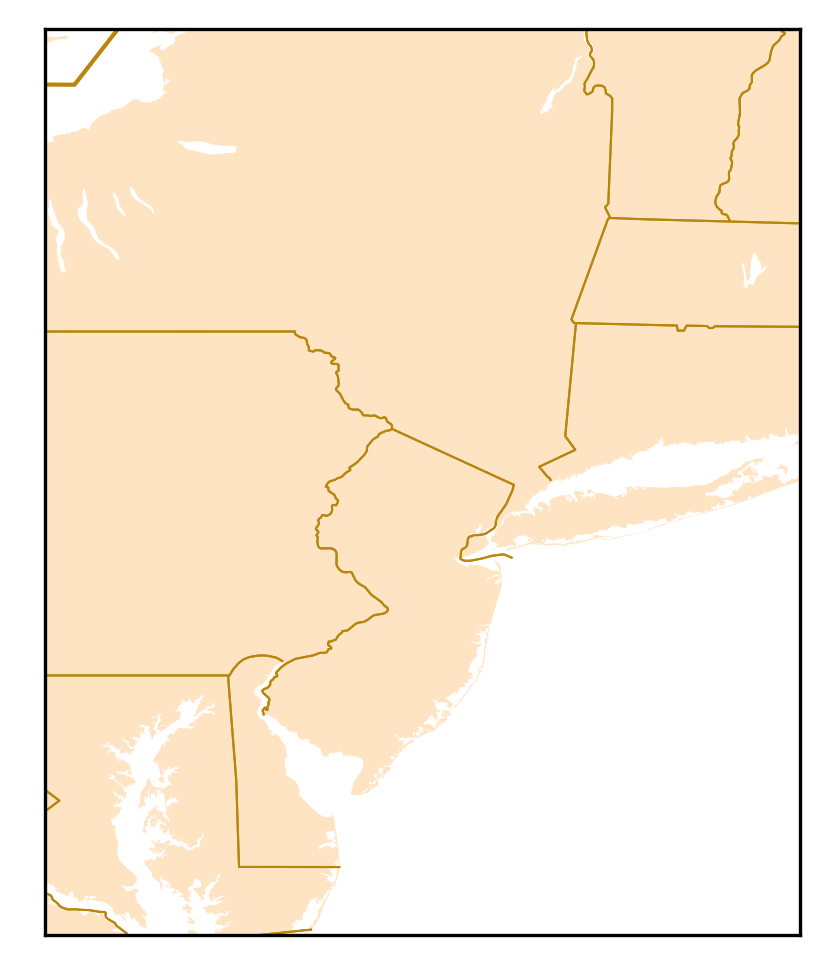

In [6]:
# make sure we have a reasonable plot of the Delaware River region
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
bm = pbm.Basemap(llcrnrlon=-77, llcrnrlat=38, urcrnrlon=-72, urcrnrlat=44, resolution='h', epsg='4269')
bm.fillcontinents(color='bisque')
bm.drawcountries(linewidth=1, color='darkgoldenrod')
bm.drawstates(color='darkgoldenrod')




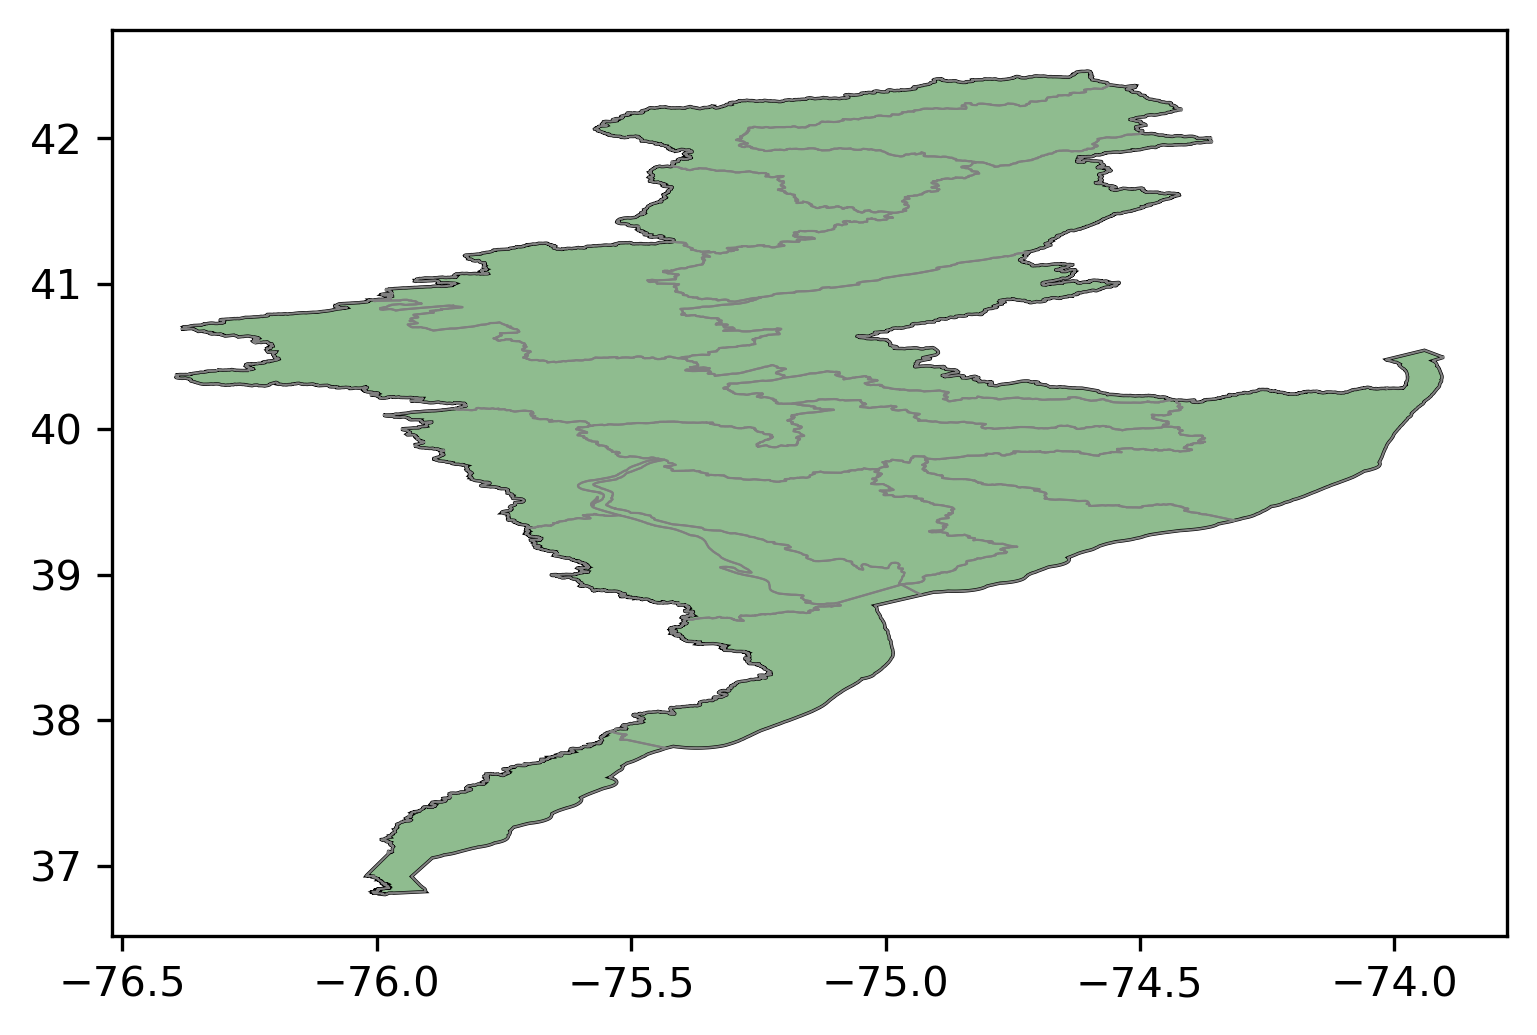

In [11]:
# make sure we have a reasonable plot of the HUCs
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

del_xy = huc.exterior().exterior.xy
polygon_shape = pltp.Polygon(np.array(del_xy).transpose(), linewidth=0.8, edgecolor='k', facecolor='darkseagreen')
ax.add_patch(polygon_shape)

for h8 in huc.polygons():
    coords = h8.exterior.xy
    ax.plot(coords[0], coords[1], color='gray', linewidth=.5)


    

2019-07-09 23:37:47,527 - root - INFO: 
2019-07-09 23:37:47,529 - root - INFO: Preprocessing Hydrography
2019-07-09 23:37:47,535 - root - INFO: ------------------------------
2019-07-09 23:37:47,539 - root - INFO: loading streams in bounds (-76.3955534, 36.8008194, -73.9026218, 42.4624454)


ValueError: National Hydrography Dataset (NHD): files are organized at HUC level 8, so cannot ask for a larger HUC than that level.

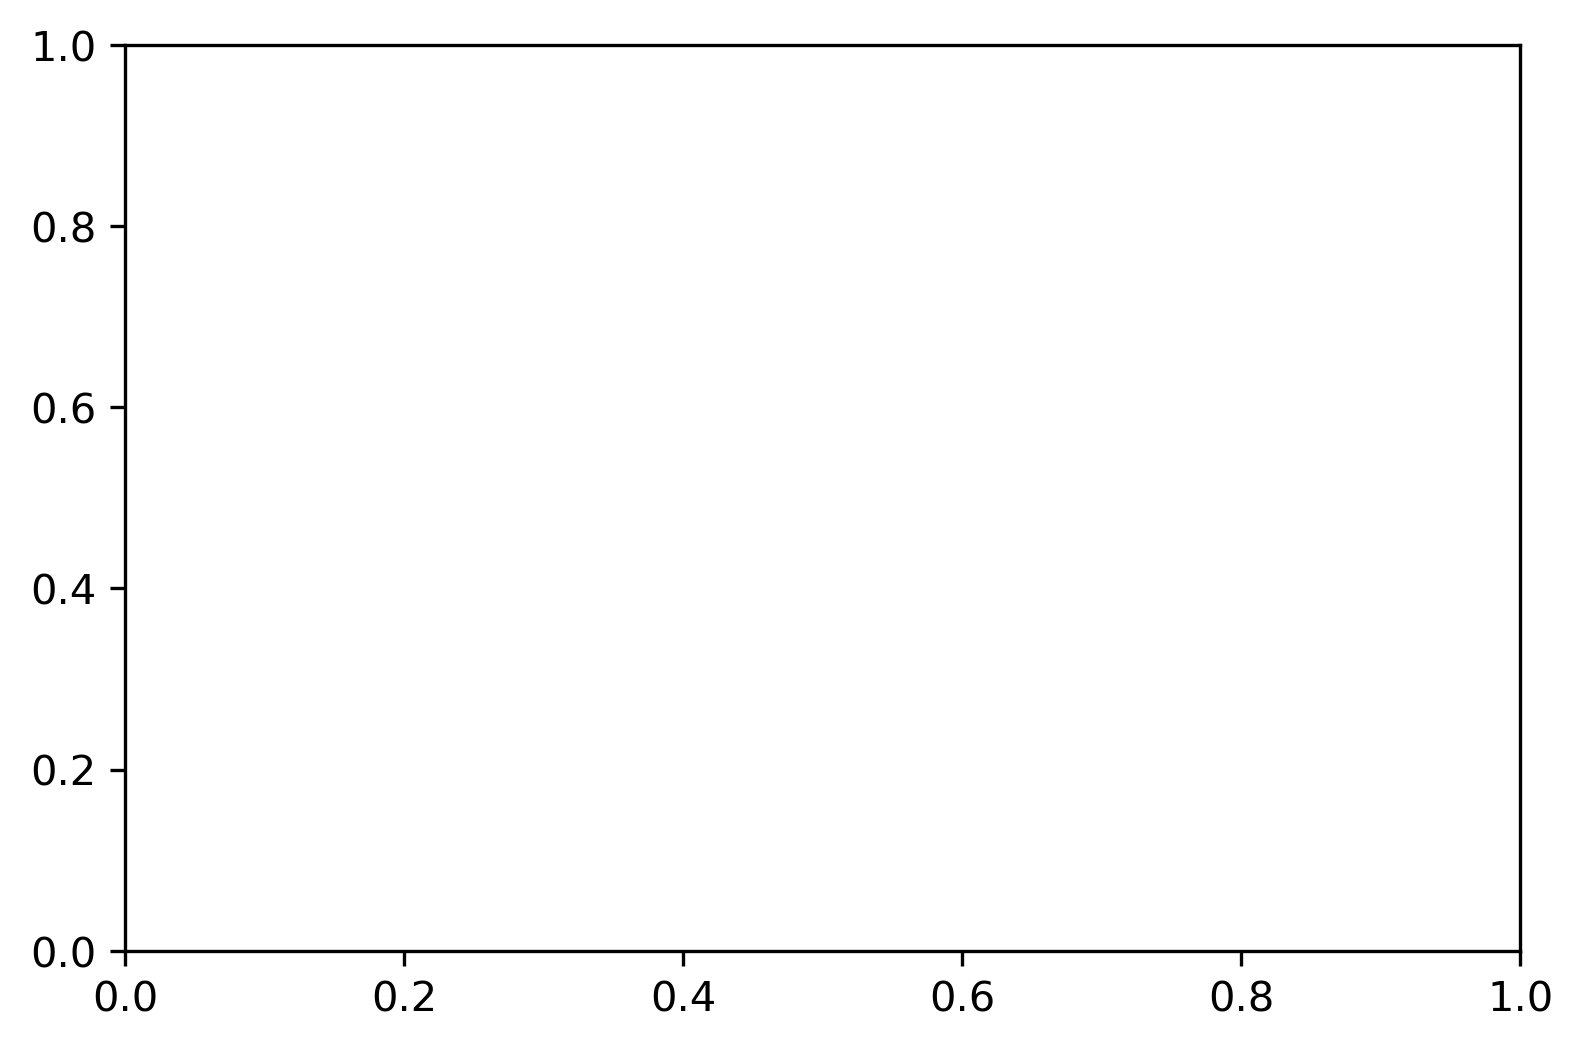

In [12]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

lines = []
rivers, centroid = workflow.get_rivers_by_bounds(sources['hydrography'], 
                                                 huc.exterior().bounds, crs, HUC, centering=centroid)

   
lc = pltc.LineCollection(lines, colors='b', linewidths=0.4)
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
    
    






In [ ]:
import fiona
import shapely.geometry

In [ ]:
delriv = fiona.open('data/hydrologic_units/others/Delaware/delriv/delawareriver.shp')
old_crs = fiona.crs.from_epsg(delriv.profile['crs']['init'].split(':')[-1])
lines = []
for shp in delriv:
    workflow.warp.warp_shape(shp, old_crs, crs)
    lines.extend(np.array(seg) for seg in shp['geometry']['coordinates'])


In [ ]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, facecolor='lightsteelblue')
bm = pbm.Basemap(llcrnrlon=-77, llcrnrlat=38, urcrnrlon=-72, urcrnrlat=44, resolution='f', epsg='4269')
bm.fillcontinents(color='bisque')
bm.drawcountries(linewidth=1, color='darkgoldenrod')
bm.drawstates(color='darkgoldenrod')

for h4 in huc_4s:
    coords = h4['geometry']['coordinates'][0]
    ax.plot(coords[:,0], coords[:,1], color='gray', linewidth=.7)

for h8 in huc_8s:
    coords = h8['geometry']['coordinates'][0]
#    if h8['properties']['Name'] in ['Eastern Lower Delmarva',]:
#        polygon_shape = pltp.Polygon(coords, linewidth=0.4, edgecolor='red', facecolor='None')
    if h8['properties']['Name'] == 'Delaware Bay':
        polygon_shape = pltp.Polygon(coords, linewidth=0.4, edgecolor='gray', facecolor='lightsteelblue', alpha=0.3)
    else:
        polygon_shape = pltp.Polygon(coords, linewidth=0.4, edgecolor='gray', facecolor='darkseagreen', alpha=0.3)
    if polygon_shape is not None:
        ax.add_patch(polygon_shape)

lc = pltc.LineCollection(lines, colors='b', linewidths=0.4)
ax.add_collection(lc)

plt.savefig('delaware_river_map')
plt.show()

In [ ]:
[h['properties']['Name'] for h in huc_8s]

In [ ]:
huc_4s
